In [1]:
import numpy as np # linear algebra
import pandas as pds # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import os
import ipywidgets as widgets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Dataset Overview

In [14]:
# Test

file =('https://raw.githubusercontent.com/pdjohnson1984/Capstone/master/PET_PRI_GND_DCUS_NUS_W.csv')
data = pds.read_csv(file)

data.describe()





,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


# Diesel Prices From 1995-2021

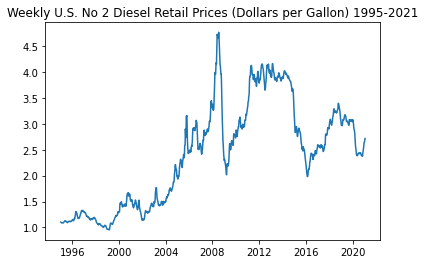

In [10]:
title = 'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 1995-2021'
import datetime
import random
import matplotlib.pyplot as plt

diesel_data = data.drop(columns=['A1',
       'A2',
       'A3',
       'R1',
       'R2',
       'R3',
       'M1',
       'M2',
       'M3',
       'P1',
       'P2',
       'P3'])
diesel_data.rename( columns={'D1':'Diesel'}, inplace=True )
diesel_data['Date']= pds.to_datetime(diesel_data['Date'])
col1='Diesel'
col2='Date'
y = diesel_data[col1]
x = diesel_data[col2]
plt.plot(x,y)
plt.gca().set_title(title)
plt.show()

# Display Gas Prices Per Selected Day

In [12]:
w = widgets.DatePicker(
    description = 'Pick a Date',
    disabled = False,
    value = datetime.date(2021,1,25)
)
output = widgets.Output()
display(w)
button = widgets.Button(description = "Get Data!")
display(button, output)



def on_button_clicked(b):
    with output:
        title = f"Weekly U.S. Retail Gasoline Prices {w.value.strftime('%m/%d/%Y')}"
        filter = data['Date'] != w.value.strftime('%m/%d/%Y')
        df_today = data.drop(data[filter].index, inplace=False)
        plt.figure(figsize=(6,3))
        plt.title(title)
        sns.barplot(data=df_today)
        plt.show()

button.on_click(on_button_clicked)

DatePicker(value=datetime.date(2021, 1, 25), description='Pick a Date')

Button(description='Get Data!', style=ButtonStyle())

Output()

# Linear Regression Model of Prices

Diesel
score = 53.41
coef = [0.09010781]
intercept = -178.52281241298084
SciKit-Learn


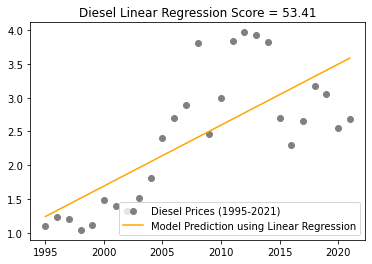

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression
print('Diesel')
diesel_data['Year'] = 0
diesel_data['Year'] = diesel_data['Date'].dt.strftime('%Y').astype(int)
diesel_data.drop(columns=['Date'])
diesel_year = diesel_data[["Year", "Diesel"]].groupby(['Year'],as_index=False).mean()
x = diesel_year[['Year']].values
y = diesel_year['Diesel'].values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
score = round(score*100,2)
title = f"Diesel Linear Regression Score = {score}"
plt.title(title)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
# plt.ylim(0) # start at zero
plt.legend(['Diesel Prices (1995-2021)','Model Prediction using Linear Regression'])
plt.show()

# Select a Year to Predict Future Price of Diesel

In [6]:
diesel_info = diesel_data[["Year", "Diesel"]].groupby(['Year'],as_index=False).mean()
X = diesel_info['Year']
y = diesel_info['Diesel']
slope, intercept, r, p, std_err = stats.linregress(X, y) # scipy

year = widgets.IntSlider(
    value=7,
    min=2000,
    max=2100,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(year)
button_predict = widgets.Button(description = "Predict Data!")
display(button_predict)

warnings.simplefilter(action='ignore', category=FutureWarning)

def on_buttonpredict_clicked(b):
    print("{}: ${} USD".format(year.value, modelPrediction(year.value)))

def modelPrediction(x):
    return slope * x + intercept

button_predict.on_click(on_buttonpredict_clicked)

IntSlider(value=2000, description='Year:', max=2100, min=2000)

Button(description='Predict Data!', style=ButtonStyle())

2011: $2.6839940753825147 USD
2022: $3.675179988546091 USD
2031: $4.486150281134485 USD
2052: $6.378414297174089 USD
2047: $5.9278752457360895 USD
